In [43]:
include("systems.jl")
include("legendre.jl")
include("regressions.jl")
include("factorization.jl")
include("iterative_methods.jl")

using Plots
using DataFrames

# 1A 
![Punto 1.A](./images/1a.png)

## 1A.1

In [44]:
A = Float64.([2 -6 -1; -3 -1 7; -8 1 -2])
b = vec(Float64.([-38 -34 -20]))

exact_solution = inv(A)*b
print("Exact solution: ", exact_solution)

Exact solution: [4.0, 8.0, -1.9999999999999996]

***Eliminación gaussiana***:

In [45]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[2.0 -6.0 -1.0; 0.0 -10.0 5.5; 0.0 0.0 -18.65]
Reduced vector: 
[-38.0, -91.0, 37.29999999999998]
Solution: 
[4.0; 8.0; -1.9999999999999993;;]


***Eliminación gaussiana con pivoteo parcial:***

In [46]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -1.375 7.75; 0.0 0.0 -33.90909090909091]
Reduced vector: 
[-20.0, -26.5, 67.81818181818181]
Solution: 
[4.0; 8.0; -2.0;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:*** 

In [47]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [6.0; 7.0; 8.0;;]
Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -1.375 7.75; 0.0 0.0 -33.90909090909091]
Reduced vector: 
[-20.0, -26.5, 67.81818181818181]
Solution: 
[4.0; 8.0; -2.0;;]


## 1A.2

In [48]:
A = Float64.([0 -3 7; 1 2 -1; 5 -2 0])
b = vec(Float64.([2 3 2]))

exact_solution = inv(A)*b
print("Exact solution: ", exact_solution)

Exact solution: [0.9855072463768118, 1.463768115942029, 0.9130434782608695]

***Eliminación gaussiana***:

In [49]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[0.0 -3.0 7.0; NaN Inf -Inf; NaN NaN NaN]
Reduced vector: 
[2.0, -Inf, NaN]
Solution: 
[NaN; NaN; NaN;;]


***Eliminación gaussiana con pivoteo parcial:***

In [50]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[5.0 -2.0 0.0; 0.0 2.4 -1.0; 0.0 0.0 5.75]
Reduced vector: 
[2.0, 2.6, 5.25]
Solution: 
[0.9855072463768118; 1.463768115942029; 0.9130434782608695;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:***

In [51]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [7.0; 2.0; 5.0;;]
Reduced matrix: 
[0.0 2.4 -1.0; 5.0 -2.0 0.0; -7.5 0.0 7.0]
Reduced vector: 
[2.6, 2.0, -1.0]
Solution: 
[Inf; -1.0; -0.14285714285714285;;]


### Conclusiones:

Conclusiones del punto 1A (1A.1 y 1A.2)

# 1B
![Punto 1.B](images/1b.png)

In [52]:
A = Float64.([3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10])
b = vec(Float64.([7.85 -19.3 71.4]))

3-element Vector{Float64}:
   7.85
 -19.3
  71.4

In [53]:
L, U = LU(A)
println("A: \n", L*U)
println("L: \n", L)
println("U: \n", U)

A: 
[3.0 -0.1 -0.2; 0.1 6.996666666666667 -0.30666666666666664; 0.3 -0.21000000000000002 9.98857142857143]
L: 
[1.0 0.0 0.0; 0.03333333333333333 1.0 0.0; 0.09999999999999999 -0.028571428571428574 1.0]


U: 
[3.0 -0.1 -0.2; 0.0 7.0 -0.3; 0.0 0.0 10.0]


In [54]:
# solution
L,U = LU(A)
y = solution(L,b)
x = solution(U,y)
println("Solution: \n", x)
println("Exact solution: \n", inv(A)*b)

Solution: 
[2.6166666666666667, -2.7945238095238096, 7.005609523809525]
Exact solution: 
[3.0, -2.4999999999999996, 7.000000000000001]


# 2A

![Punto 2A](./images/2a.png)

In [55]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans1 = jacobi(A, b, x, tol, is_absolute = false)

3-element Vector{Float64}:
 319.49652777777777
 226.0926783264746
 320.5977794924554

In [56]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans2 = gauss_siedel(A, b, x, tol, is_absolute = false)

3-element Vector{Float64}:
 319.32535718746294
 226.54018661320117
 321.15346794692107

# 2B
![Punto 2B](./images/2b.png)

#### 2B.1

![Alt text](./images/2b1.png)

In [57]:
A = [2 -6 -1; -3 -1 7; -8 1 -2]
b = vec([-38 -34 -20])
x = vec([0 0 0])

tol         = 0.001
norm_type   = "infinite"
is_absolute = false

print("Exact solution: ", inv(A)*b)

Exact solution: [4.0, 8.0, -1.9999999999999996]

In [58]:
ans3 = jacobi(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

In [59]:
ans4 = gauss_siedel(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

#### 2B.2

![Alt text](./images/2b2.png)

In [60]:
A = [0 -3 7; 1 2 -1; 5 -2 0]
b = vec([2 3 2])
x = vec([0 0 0])

tol         = 0.001
norm_type   = "infinite"
is_absolute = false

false

In [61]:
ans5 = jacobi(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

LAPACKException: LAPACKException(1)

In [62]:
ans6 = gauss_siedel(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

LAPACKException: LAPACKException(1)

#### 2B.3
![Alt text](./images/2b3.png)

In [63]:
A = [3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10]
b = vec([7.85 -19.3 71.4])
x = vec([0 0 0])

tol         = 0.001
norm_type   = "infinite"
is_absolute = false

println("exact solution: \n", inv(A)*b)

exact solution: 
[3.0, -2.4999999999999996, 7.000000000000001]


In [64]:
ans7 = jacobi(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

3-element Vector{Float64}:
  3.000022496598639
 -2.5000026621315192
  6.999981040816327

In [65]:
ans8 = gauss_siedel(A, b, x, tol, is_absolute = is_absolute, norm = norm_type)

3-element Vector{Float64}:
  3.0000003524692724
 -2.5000000357546064
  6.99999998871083

# 2C
![Punto 2C](./images/2c.png)

# 3A

![3a](./images/3a.png)

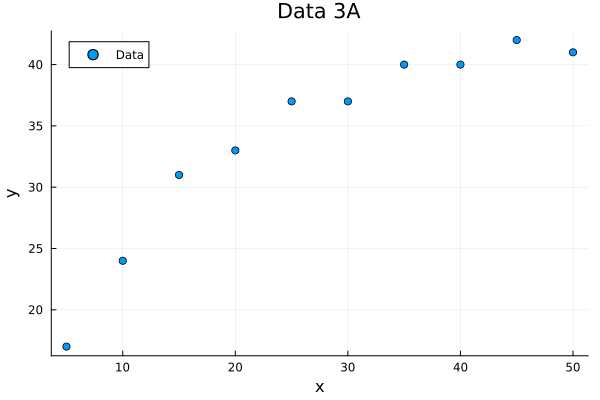

In [67]:
start = 5
end_ = 50
x = vec(range(start = start, stop = end_, step = 5))
y = vec([17 24 31 33 37 37 40 40 42 41])
points = [(x[i], y[i]) for i in 1:length(x)]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")

## 3A.1

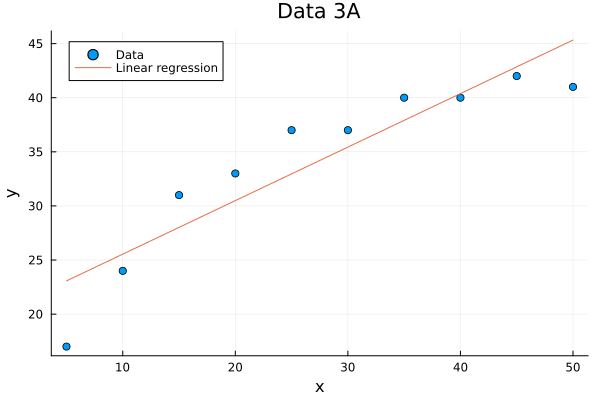

In [68]:
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(lin_fn, start, end_, label = "Linear regression")

## 3A.2

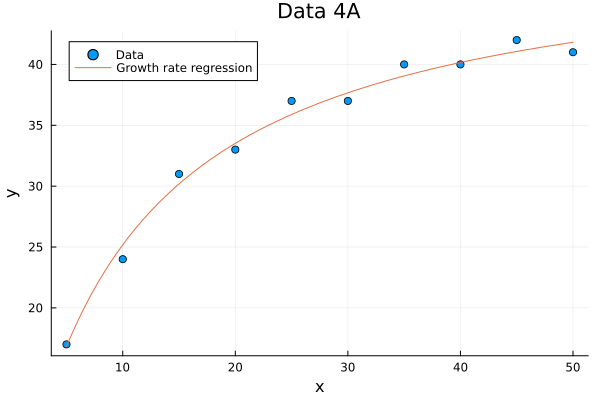

In [69]:
a0, a1 = growth_rate_regression(points)
growth_rate_fn = build_growth_rate_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 4A")
plot!(growth_rate_fn, start, end_, label = "Growth rate regression")

## 3A.3

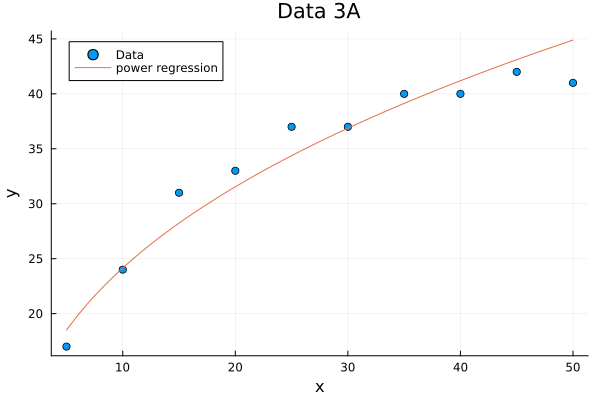

In [70]:
a0, a1 = power_regression(points)
pow_fn = build_pow_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(pow_fn, start, end_, label = "power regression")

## 3A.4

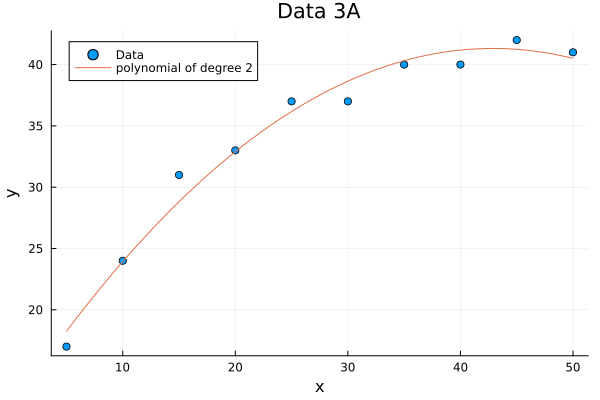

In [71]:
degree = 3
a = polynomial_regression(points, degree)
quad_fn = build_poly_fn(a)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(quad_fn, start, end_, label = "polynomial of degree $(degree-1)")


## 3A.5

In [72]:
generated_points = [y, lin_fn.(x), growth_rate_fn.(x),  pow_fn.(x), quad_fn.(x)]

df = DataFrame(generated_points, [:x, :linear, :growth_rate, :power, :polynomial])
df

Row,x,linear,growth_rate,power,polynomial
,Float64,Float64,Float64,Float64,Float64
1,17.0,23.0727,16.8192,18.4973,18.2545
2,24.0,25.5455,25.1828,24.1561,23.9394
3,31.0,28.0182,30.1864,28.2381,28.8212
4,33.0,30.4909,33.5161,31.5462,32.9
5,37.0,32.9636,35.8915,34.3768,36.1758
6,37.0,35.4364,37.6714,36.877,38.6485
7,40.0,37.9091,39.0548,39.1323,40.3182
8,40.0,40.3818,40.1609,41.1971,41.1848
9,42.0,42.8545,41.0656,43.1087,41.2485


## 3A.6

Para saber cuál es mejor usaremos el standard estimation error generado por cada método

In [73]:
funcs = [lin_fn, growth_rate_fn, pow_fn, quad_fn]
standard_errors = [standard_stimation_error(points, func) for func in funcs]

df = DataFrame(linear      = [standard_errors[1]],
               growth_rate = [standard_errors[2]],
               power       = [standard_errors[3]],
               polynomial  = [standard_errors[4]]) 

Row,linear,growth_rate,power,polynomial
,Float64,Float64,Float64,Float64
1,3.48503,0.901602,2.16448,1.22691


El ajuste superior para los datos fue el de un modelo de regresión por tasa de crecimiento, esto observando los niveles de error generados por cada modelo de regresion.

# 3B

![3b](./images/3b.png)

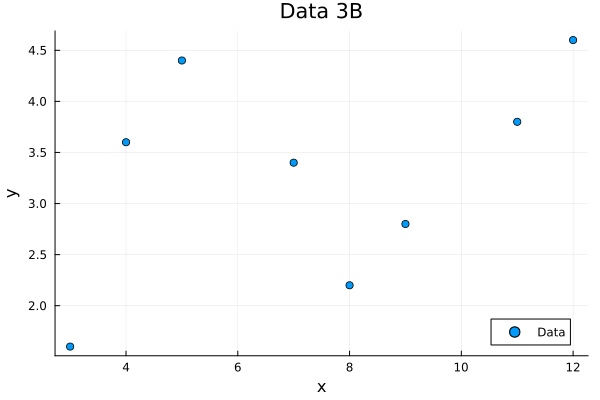

In [74]:
x = vec([3 4 5 7 8 9 11 12])
y = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])
points = [(x[i], y[i]) for i in 1:length(x)]

start = x[1]
end_ = x[end]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")

## 3B.1

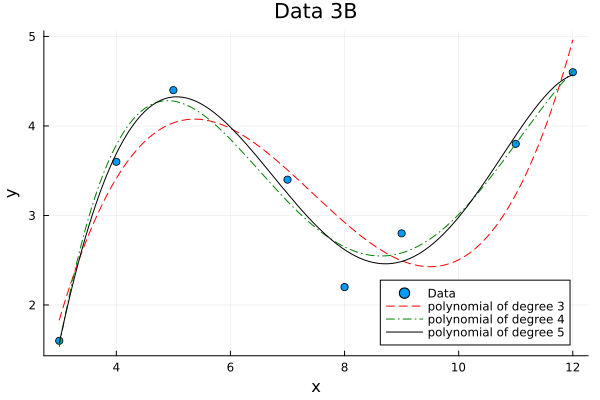

In [75]:
degree = 4

fn_degree3 = build_poly_fn(polynomial_regression(points, degree))
fn_degree4 = build_poly_fn(polynomial_regression(points, degree + 1))
fn_degree5 = build_poly_fn(polynomial_regression(points, degree + 2))

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")
plot!(fn_degree3, start, end_, label = "polynomial of degree $(degree-1)",  color = :red,   linestyle = :dash,)
plot!(fn_degree4, start, end_, label = "polynomial of degree $(degree)",    color = :green, linestyle = :dashdot,)
plot!(fn_degree5, start, end_, label = "polynomial of degree $(degree+1)",  color = :black)

## 3B.2

## 3B.3

## 3B.4

# 3C

![Alt text](./images/3c.png)

## 3C.1

Para poder aplicar legendre es necesario que los datos esten en el intervalo [-1,1], por lo tanto se debe hacer un cambio de variable para que los datos esten en ese intervalo.

El cambio de variable es el siguiente:

$$
\begin{align*}
    x &= \frac{(b-a) \times (t+1)}{2} + a \\
    t &= 2\frac{(x-a)}{b-a} - 1
\end{align*}
$$

In [79]:
# x = ((b - a)*(t + 1)/2) + a
# t = -1 + (2*(x - a)/(b - a))
function change_of_variable(x, a::Float64, b::Float64)::Float64
    return -1 + (2*(x - a)/(b - a))
end
function change_of_variable_inv(t, a::Float64, b::Float64)::Float64
    return a + ((b - a)*(t + 1)/2)
end

change_of_variable_inv (generic function with 1 method)

In [80]:
function fx1(x)
    return exp(x)
end
function ft1(t)
    return exp( (((b-a)*(t + 1)/2) + a) )
end

ft1 (generic function with 1 method)

Number of polynomials: 5
Coefficients: 5


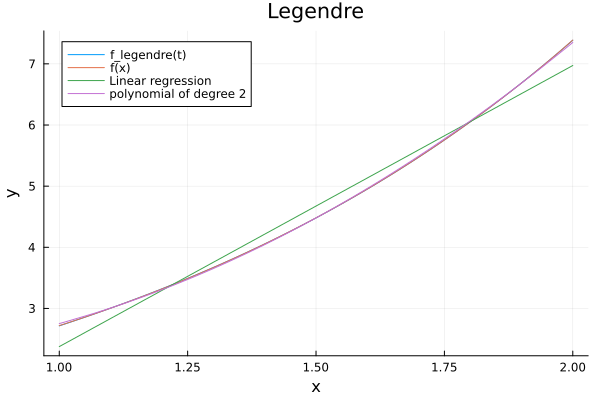

In [91]:
@variables x
a = 1.0
b = 2.0
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

# build the domains for the functions, the original and the transformed
xdom = range(start = a, stop = b, length = 100)
tdom = change_of_variable.(xdom, a, b)

# apply legendre over the transformed function
f1 = legendre(ft1, a_, b_ , 3)
yprima = f1.(tdom)

#sample some points from the function
points = vec([(xdom[i], fx1(xdom[i])) for i in 1:length(xdom)])

# apply linear regression over the points of the function
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

# apply polynomial regression over the points of the function
degree = 3
coefs = polynomial_regression(points, degree)
quad_fn = build_poly_fn(coefs)

plot(xdom,  yprima,     label = "f_legendre(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(xdom, fx1.(xdom), label = "f(x)",          xlabel = "x", ylabel = "y", title = "Legendre")

plot!(lin_fn,  a, b, label = "Linear regression")
plot!(quad_fn, a, b, label = "polynomial of degree $(degree-1)")

## 3C.2

In [94]:
function fx2(x)
    return 1/x
end
function ft2(t)
    return 1/(((b-a)*(t + 1)/2) + a) 
end

ft2 (generic function with 1 method)

Number of polynomials: 5
Coefficients: 5


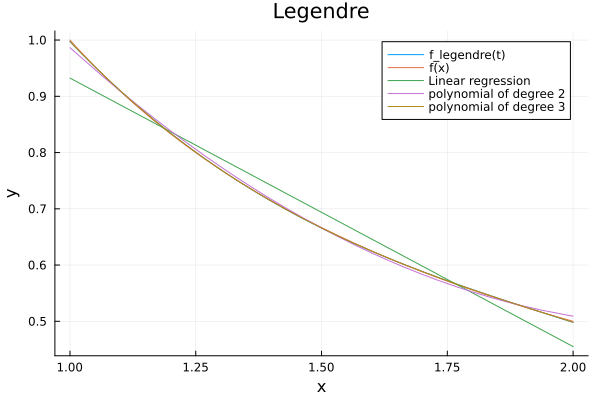

In [102]:
@variables x
a = 1.0
b = 2.0
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

# build the domains for the functions, the original and the transformed
xdom = range(start = a, stop = b, length = 100)
tdom = change_of_variable.(xdom, a, b)

# apply legendre over the transformed function
f2 = legendre(ft2, a_, b_ , 3)
yprima = f2.(tdom)

#sample some points from the function
points = vec([(xdom[i], fx2(xdom[i])) for i in 1:length(xdom)])

# apply linear regression over the points of the function
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

# apply polynomial regression over the points of the function
degree1 = 3
coefs   = polynomial_regression(points, degree1)
quad_fn = build_poly_fn(coefs)

degree2  = 4
coefs    = polynomial_regression(points, degree2)
cubic_fn = build_poly_fn(coefs)

plot(xdom,  yprima,     label = "f_legendre(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(xdom, fx2.(xdom), label = "f(x)",          xlabel = "x", ylabel = "y", title = "Legendre")

plot!(lin_fn,   a, b, label = "Linear regression")
plot!(quad_fn,  a, b, label = "polynomial of degree $(degree1-1)")
plot!(cubic_fn, a, b, label = "polynomial of degree $(degree2-1)")

## 3C.3

In [98]:
function fx3(x)
    return (2*x)^3
end
function ft3(t)
    return (2*(((b-a)*(t + 1)/2) + a))^3
end

ft3 (generic function with 1 method)

Number of polynomials: 5
Coefficients: 5


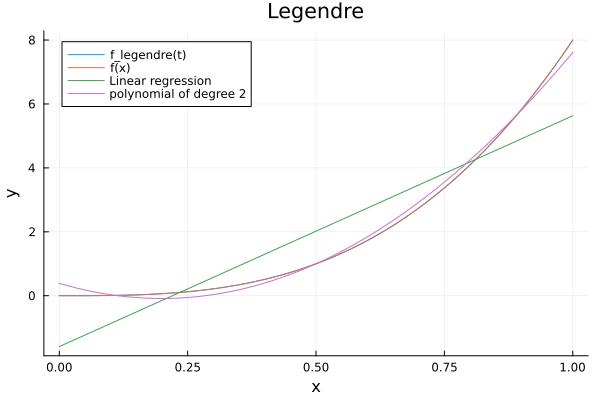

In [101]:
@variables x
a = 0.0
b = 1.0
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

# build the domains for the functions, the original and the transformed
xdom = range(start = a, stop = b, length = 100)
tdom = change_of_variable.(xdom, a, b)

# apply legendre over the transformed function
f3 = legendre(ft3, a_, b_ , 3)
yprima = f3.(tdom)

#sample some points from the function
points = vec([(xdom[i], fx3(xdom[i])) for i in 1:length(xdom)])

# apply linear regression over the points of the function
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

# apply polynomial regression over the points of the function
degree = 3
coefs = polynomial_regression(points, degree)
quad_fn = build_poly_fn(coefs)

plot(xdom,  yprima,     label = "f_legendre(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(xdom, fx3.(xdom), label = "f(x)",          xlabel = "x", ylabel = "y", title = "Legendre")

plot!(lin_fn,  a, b, label = "Linear regression")
plot!(quad_fn, a, b, label = "polynomial of degree $(degree-1)")

# 3D

![Alt text](./images/3d.png)

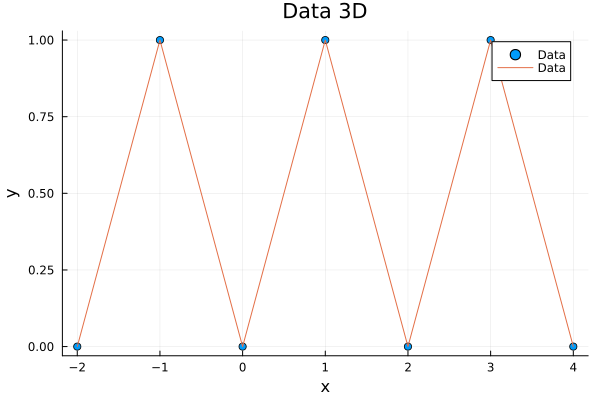

In [106]:
xdomain = vec(range(start = -2, stop = 4, step = 1))
yrange  = vec([0 1 0 1 0 1 0]) 
points = [(xdomain[i], yrange[i]) for i in 1:length(xdomain)]

scatter(xdomain, yrange, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3D")
plot!(xdomain,   yrange, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3D")